<a href="https://colab.research.google.com/github/sopyjj/lumin8/blob/main/D2C1VC_NLP_Classification_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Classification
Harvard AI Bootcamp

## Make a copy of this notebook! Editing directly will not be saved.

You will be working on a dataset of "documents," short text strings encompassing comments, statements, tweets, etc. Each document is paired with its emotion, e.g. "I love AI!" is paired with "joy." You could think of these as short tweets.

To begin, download the dataset from https://drive.google.com/file/d/10s1fJPzTOQQ1n84rUVaVMrR4MkuuUIiL/view

The dataset is formatted as a .csv file, with documents under the "Comment" column and emotions under the "Emotion" column. Each row represents one document and its emotion. Upload this in the files section on the left of your Colab notebook.

In [ ]:
#Load the data as a Pandas dataframe
import pandas as pd
df = pd.read_csv('emotions.csv')

In [ ]:
df.head()

## Part A: Exploratory Analysis and Visualizations

Before looking for relationships, get a general idea of the shape of the dataset. Explore the data to gain an understanding of the variables that exist. To help guide you through the process, here are a few questions to get started.

What is the shape of the data? How many documents and unique emotions are there? How many documents per unique emotion? \\


In [ ]:
# TODO: calculate the length of the dataframe


20000

In [ ]:
# TODO: count the frequency of emotions


joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

What are the 5 most common words per emotion? Most common 2-letter combo? 3-letter combo? Write a function to find the most common n-word combination for a particular emotion.



In [ ]:
# Imports from nltk, an nlp library.
import nltk
from collections import Counter
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def most_common_ngrams(emotion, n):
    text = ' '.join(df[df['Emotion'] == emotion]['Comment'].tolist())
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    if n == 1:
        return Counter(words).most_common(5)
    # TODO: we have implemented the unigram above. The code you will implement
    # below is very similar, but for bigram and trigrams. Please refer to the nltk
    # imports above for a hint

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
for emotion in df['Emotion'].unique():
  print(emotion)

  # Index until 4 because we want unigram, bigram, AND trigrams
  for i in range(1, 4):
    print(most_common_ngrams(emotion, i))

sadness
[(('i', 'feel', 'like'), 468), (('i', 'feel', 'so'), 264), (('feel', 'like', 'i'), 193), (('i', 'was', 'feeling'), 166), (('i', 'am', 'feeling'), 143)]
[('i', 9440), ('feel', 4079), ('and', 3372), ('to', 2935), ('the', 2682)]
[(('i', 'feel'), 2568), (('i', 'am'), 637), (('feel', 'like'), 618), (('i', 'was'), 516), (('that', 'i'), 457)]
anger
[(('i', 'feel', 'like'), 236), (('i', 'was', 'feeling'), 101), (('feel', 'like', 'i'), 93), (('i', 'am', 'feeling'), 89), (('i', 'feel', 'so'), 83)]
[('i', 4484), ('feel', 1796), ('and', 1584), ('to', 1449), ('the', 1403)]
[(('i', 'feel'), 1147), (('i', 'am'), 317), (('feel', 'like'), 305), (('i', 'was'), 270), (('that', 'i'), 218)]
love
[(('i', 'feel', 'like'), 183), (('feel', 'like', 'i'), 60), (('i', 'feel', 'that'), 58), (('i', 'feel', 'so'), 45), (('i', 'am', 'feeling'), 43)]
[('i', 2641), ('feel', 1180), ('and', 1119), ('to', 1049), ('the', 969)]
[(('i', 'feel'), 727), (('feel', 'like'), 235), (('i', 'am'), 185), (('that', 'i'), 144),

A lot of meaningless words! "i', 'and', 'me', etc. These are called **stop words**. These are words to be filtered out before analyzing natural language, because they are meaningless. Stop words are predefined lists of words to be filtered out.

## Part B: Modeling

### Data split
Split our data into 80% train, 20% test.

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Comment']
y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Word Embeddings

Word embeddings are a technique for transforming text data into numerical, vectorized form. One popular approach is Word2Vec, which creates vector representations of words by leveraging the surrounding context to capture semantic and syntactic relationships between words in a text corpus.

On a more granular level, Word2Vec works by utilizing a shallow neural network to learn the vector representations of words.

Given a target word, it aims to predict the context words around it. The model learns by minimizing the difference between the predicted probability distributions and the true one-hot encoded context word vectors.

These embeddings are capable of encoding various linguistic properties, such as semantic similarity, analogies, and even some grammatical relationships.


In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import numpy as np

# Example of loading a pre-trained Word2Vec model (adjust the file path as needed)
# model = KeyedVectors.load_word2vec_format('path_to_word2vec_model.bin', binary=True)

# If you want to train a Word2Vec model on your data:
sentences = [text.split() for text in X_train]  # Tokenizing the text
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to create a document vector by averaging word vectors
def document_vector(word2vec_model, doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in word2vec_model.wv.key_to_index]
    return np.mean(word2vec_model.wv[doc], axis=0) if doc else np.zeros(word2vec_model.vector_size)


# Apply the function to your text data
# TODO
X_train_vectors = ...
X_test_vectors = ...

# Now you can use X_train_vectors and X_test_vectors for machine learning

In [ ]:
# 100 features
X_train_vectors.shape

(16000, 100)

Now it's easy to train a logistic regression with our tabular data.

In [ ]:
# Assuming X_train_vectors and X_test_vectors are already created using Word2Vec embeddings
from sklearn.linear_model import LogisticRegression

# Training a Logistic Regression model. Use the .fit() and .predict() methods.
# TODO

# Define the Logistic Regression
logreg_model =

# Fit the model to the training data


# Making predictions
y_train_pred_w2v =
y_test_pred_w2v =

# Computing accuracies
train_accuracy_w2v =
test_accuracy_w2v =
# END TODO

print("Word2Vec + Logistic Regression")
print("Train Accuracy:", train_accuracy_w2v)
print("Test Accuracy:", test_accuracy_w2v)



,Model,Train Accuracy,Test Accuracy
0,TF-IDF + Logistic Regression,0.937937,0.85775
1,Word2Vec + Logistic Regression,0.382437,0.37100


It's pretty bad! How come?

In [ ]:
df['Emotion'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

Remember that the data is very imbalanced - 'surprise' only has 719 data points. Word2Vec can't collect the semantic and syntactic of words properly, and it needs large training data to learn the word representation. TF-IDF, which is one of the optional activities below, on the other hand is effective even with a small number of data.

### Recurrent Neural Network

RNNs are deep neural networks with recurrent connections, meaning that they allow the output from certain nodes to affect the *input* into the same node (not just the next node as in a typical forward neural network). They can use internal memory to process arbitrary input sequences, which lends well to text data.

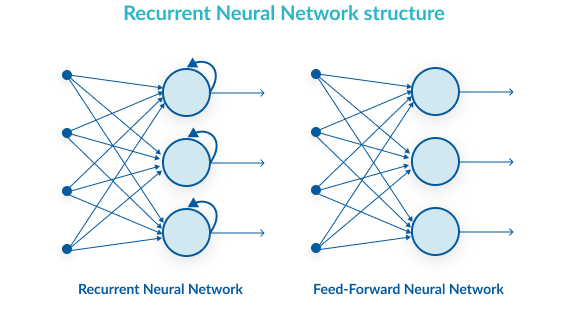

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Assume X_train, X_test, y_train, y_test are already defined with text data and labels

# Tokenization and Vocabulary Building
tokenizer = get_tokenizer('basic_english')
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(X_train), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# Assuming y_train contains categorical labels
unique_labels = set(y_train)
label_to_index = {label: index for index, label in enumerate(unique_labels)}

# Text and Label Processing
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda label: label_to_index[label]  # Define label_to_index based on your labels

# Convert datasets to TensorDatasets
def process_data(X, y):
    processed_text = [torch.tensor(text_pipeline(x), dtype=torch.int64) for x in X]
    processed_label = torch.tensor([label_pipeline(label) for label in y], dtype=torch.int64)
    return TensorDataset(pad_sequence(processed_text, batch_first=True), processed_label)

train_dataset = process_data(X_train, y_train)
test_dataset = process_data(X_test, y_test)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define a simple RNN model. Use torch.nn layers.
# TODO
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(SimpleRNN, self).__init__()
        self.embedding =
        self.rnn =
        self.fc =

    def forward(self, x):
        embedded =
        _, hidden =
        return

# Instantiate the model
model = SimpleRNN(len(vocab), embed_dim=100, hidden_dim=256, output_dim=len(set(y_train)))

# Loss and Optimizer. Loss should be cross entropy, optimizer is up to you.
criterion =
optimizer =

# Training Loop
for epoch in tqdm(range(1)):  # Number of epochs
    for text, labels in tqdm(train_loader):
        ...

# END TODO

# Evaluate the model
model.eval()
total_accuracy = 0
with torch.no_grad():
    for text, labels in test_loader:
        output = model(text)
        total_accuracy += (output.argmax(1) == labels).float().mean().item()
accuracy = total_accuracy / len(test_loader)
print(f"Test Accuracy: {accuracy}")


100%|██████████| 1/1 [00:31<00:00, 31.26s/it]


Test Accuracy: 0.2935


In [ ]:
# Evaluate the model on training data
model.eval()
train_total_accuracy = 0
with torch.no_grad():
    for text, labels in train_loader:
        output = model(text)
        train_total_accuracy += (output.argmax(1) == labels).float().mean().item()
train_accuracy = train_total_accuracy / len(train_loader)

# Append to DataFrame
print("Word2Vec + Simple RNN")
print("Train Accuracy:", train_accuracy_w2v)
print("Test Accuracy:", test_accuracy_w2v)

,Model,Train Accuracy,Test Accuracy
0,TF-IDF + Logistic Regression,0.937937,0.85775
1,Word2Vec + Logistic Regression,0.382437,0.37100
2,Simple RNN,0.289125,0.29350


Not that good, but we only trained for 1 epoch and this is a very simple RNN.


In [ ]:
df['Emotion'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

Consider if we predicted everything as "joy". What's our accuracy?

In [ ]:
# TODO


0.33805

So that's really the performance to beat.

### BERT

Bidirectional Encoder Representations from Transformers. Language model built on transformer architecture, introduced in 2018 and performed miles better than its predecessors. Pretrained on Wikipedia text and meant to understand the meaning of language by using surrounding context. BERT can read language in both directions (left-to-right and right-to-left, hence bidirectional) unlike other models, and this is enabled by the transformer architecture.

In [ ]:
!pip install transformers

In [ ]:
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score
import numpy as np
import random
import time

In [ ]:
# Setting up the device for GPU usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
# Function to encode the data
def encode_data(tokenizer, comments, max_len):
    input_ids = []
    attention_masks = []

    for comment in comments:
        encoded_comment = tokenizer.encode_plus(
            text=comment,  # Preprocess comment
            add_special_tokens=True,  # Add `[CLS]` and `[SEP]`
            max_length=max_len,  # Max length to truncate/pad
            pad_to_max_length=True,  # Pad sentence to max length
            return_attention_mask=True,  # Return attention mask
            return_tensors='pt',  # Return PyTorch tensors
        )

        input_ids.append(encoded_comment['input_ids'])
        attention_masks.append(encoded_comment['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [ ]:
# Encode the data
max_len = 256  # You can adjust this
X_train_encoded, X_train_attention = encode_data(tokenizer, X_train.to_numpy(), max_len)
X_test_encoded, X_test_attention = encode_data(tokenizer, X_test.to_numpy(), max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the emotion labels
label_encoder.fit(df['Emotion'])

# Transform the emotion labels to integers
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded labels to torch tensors
y_train = torch.tensor(y_train_encoded)
y_test = torch.tensor(y_test_encoded)

In [ ]:
# Create DataLoader
batch_size = 32  # You can adjust this

train_data = TensorDataset(X_train_encoded, X_train_attention, y_train)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

test_data = TensorDataset(X_test_encoded, X_test_attention, y_test)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
# Load BertForSequenceClassification, a BERT model with a single linear classification layer on top
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",  # Use the 12-layer BERT model, with an uncased vocab
    num_labels = len(df['Emotion'].unique()),  # Number of output labels
    output_attentions = False,  # Whether the model returns attentions weights
    output_hidden_states = False,  # Whether the model returns all hidden-states
)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 6  # You can adjust this
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Function for accuracy calculation
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Warning, this will take about 10 minutes per epoch (even on GPU)! Train 4-6 for best performance, but reduce this number for time efficiency. The results are already displayed below for you.

---



In [ ]:
# Training loop
for epoch_i in tqdm(range(0, epochs)):
    # Training
    model.train()
    total_loss = 0
    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"  Average training loss: {avg_train_loss}")

 17%|█▋        | 1/6 [10:25<52:05, 625.03s/it]

  Average training loss: 0.6255435718819499


 33%|███▎      | 2/6 [20:52<41:44, 626.19s/it]

  Average training loss: 0.15780307874828578


 50%|█████     | 3/6 [31:19<31:19, 626.55s/it]

  Average training loss: 0.10560856089740991


 67%|██████▋   | 4/6 [41:45<20:53, 626.72s/it]

  Average training loss: 0.07817410395271145


 83%|████████▎ | 5/6 [52:12<10:26, 626.82s/it]

  Average training loss: 0.05823318957979791


100%|██████████| 6/6 [1:02:39<00:00, 626.66s/it]

  Average training loss: 0.04564942488004454


In [ ]:
# Evaluation
def evaluate(dataloader):
    model.eval()
    total_eval_accuracy = 0
    for batch in dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    avg_val_accuracy = total_eval_accuracy / len(dataloader)
    return avg_val_accuracy

In [ ]:
train_accuracy = evaluate(train_dataloader)
test_accuracy = evaluate(test_dataloader)

In [ ]:
import pandas as pd

# Define the data for the table
data = {
    "Model": [
        "OPTIONAL: TF-IDF + Logistic Regression",
        "Word2Vec + Logistic Regression",
        "Simple RNN",
        "BERT Encoder"
    ],
    "Train Accuracy": [
        0.937937,
        0.382437,
        0.289125,
        0.990437
    ],
    "Test Accuracy": [
        0.85775,
        0.37100,
        0.29350,
        0.93450
    ]
}

# Create a DataFrame
accuracy_df = pd.DataFrame(data)

# Display the DataFrame
print(accuracy_df)


,Model,Train Accuracy,Test Accuracy
0,TF-IDF + Logistic Regression,0.937937,0.85775
1,Word2Vec + Logistic Regression,0.382437,0.37100
2,Simple RNN,0.289125,0.29350
3,BERT Encoder,0.990437,0.93450


### Optional: TF-IDF

Term Frequency - Inverse Document Frequency (TF-IDF) is a method to measure the importance of a particular word in each document, relative to a wider corpus of text (our entire dataset). The metric measures both term frequency (how often the term appears in the document) and inverse document frequency (the most frequent words like "is" "of" "that" have less meaning than the rarer words like "happy").

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Create a TF-IDF vectorizer and Logistic Regression pipeline
# TODO
tfidf_pipeline =

In [ ]:
# Train the pipeline on the training data
# TODO


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [ ]:
# Making predictions
y_train_pred_tfidf = tfidf_pipeline.predict(X_train)
y_test_pred_tfidf = tfidf_pipeline.predict(X_test)

In [ ]:
# Computing accuracies
train_accuracy_tfidf = accuracy_score(y_train, y_train_pred_tfidf)
test_accuracy_tfidf = accuracy_score(y_test, y_test_pred_tfidf)

In [ ]:
accuracy_df = pd.DataFrame()

In [ ]:
# Adding the TF-IDF accuracies to the DataFrame
accuracy_df = accuracy_df.append({
    "Model": "TF-IDF + Logistic Regression",
    "Train Accuracy": train_accuracy_tfidf,
    "Test Accuracy": test_accuracy_tfidf
}, ignore_index=True)

accuracy_df

<ipython-input-14-2a4b6672ccab>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({


,Model,Train Accuracy,Test Accuracy
0,TF-IDF + Logistic Regression,0.937937,0.85775
